# Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель проекта:** Выявить определяющие успешность игры закономерности, для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Откроем файл с данными

Импортируем библиотеки.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

Прочитаем файл, изучим общую информацию.

In [3]:
try:
  data = pd.read_csv('/datasets/games.csv')
except:
  !gdown --id 1jus5HdmDfGsrC8fkTMXuJIJbECnkvGhY --quiet
  data = pd.read_csv('games.csv')

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
print(f'Количество явных дубликатов {data.duplicated().sum()}')

Количество явных дубликатов 0


In [7]:
print('Количество пропусков')
data.isna().sum()

Количество пропусков


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Итак,** в датасете 16 715 строк и 11 столбцов. Явных дубликатов нет. Есть большое количество пропусков в оценках пользователей, критиков и рейтинг от организации ESRB. Также есть небольшое количество пропусков в колонке с годом, жанром, имени. Они могли возникнуть случайно или данных просто нет(например, утвержденного названия, оценки критиков или пользователей). Колонки с малым количеством пропусков корее всего удалим, пропуски в других колонках надо рассматривать подробнее.

## Подготовка данных

### Заменим названия столбцов

In [8]:
data.columns = data.columns.str.lower()

In [9]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменим типы данных

Переведем год в целый тип для удобства.

In [10]:
data['year_of_release'] = np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64')

In [11]:
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

Приведем оценку критиков в целый тип.

In [12]:
data['critic_score'] = np.floor(pd.to_numeric(data['critic_score'], errors='ignore')).astype('Int64')

In [13]:
data['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Надо перевести колонку с оценкой пользователей в тип flaot, чтобы с ней можно было работать как с числами, но для этого необходимо обработать значение 'tbd'.

### Обработаем пропуски

Есть по два пропуска в жанрах и имени игры(это одни и те же строки), которые мы заполнить не сможем и мы их удалим. Так же имеется 269 пропуска в колонке с годом, их также мы не сможем никак заполнить и тоже удалим. Так мы потеряем 1.6% наших данных, это немного.

In [15]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Проверим строки с пустыми значениями в годах. Проверим продажи в этих строках, не являются ли они слишком большими?

In [16]:
data.loc[data['year_of_release'].isna(), 'na_sales'].max()

4.26

In [17]:
data.loc[data['year_of_release'].isna(), 'eu_sales'].max()


2.36

In [18]:
data.loc[data['year_of_release'].isna(), 'jp_sales'].max()


0.77

Слишком больших продаж нет, можно удалять.

In [19]:
data.dropna(subset=['name', 'year_of_release'], inplace=True)

Посмотрим колонку с рейтингом.

In [20]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Видим значение "К-А". Это рейтинг для детей старше 10 лет, он был переименован в Е10. Заменим эти значения.

In [21]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E10+'

Так же, здесь есть значение "RP", что означает "рейтинг ожидается". То есть он неизвестен, заменим его на NaN.

In [22]:
data.loc[data['rating'] == 'RP', 'rating'] = np.nan

In [23]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

В данных с оценкой пользователей есть аббревиатура "tbd". TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Так как получается, что оценка еще не известна, то заменим ее на NaN.

In [24]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [25]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Переведем теперь эти оценки в числовой тип.

In [26]:
data['user_score'] = (pd.to_numeric(data['user_score'], errors='coerce')).astype('float64')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [27]:
data['user_score'].isna().sum()

8981

In [28]:
data['critic_score'].isna().sum()

8461

Пропусков в оценках пользователей и критиков почти половина, заполнение этих строк исказит реальную картину. Оставим как есть.

В колонке с рейтингом заполним пропуски значением 'unknown', так как рейтинг некоторых игр мы не знаем.

In [29]:
data.loc[data['rating'].isna(), 'rating'] = 'unknown'

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


**Итак,** 
* две игры, с отсутствующими названиями и жанрами, выпущены были в 1993 году, эти пропуски могли возникнуть из-за потери данных об этих играх или у них не было утвержденного названия и жанра;
* год могли забыть указать или точная дата выхода неизвестна;
* игры могли быть еще не оценены или данные об оценках критиков или пользователей не были внесены;
* рейтинг игры мог быть еще не определен или данные могли быть не внесены;
* пропуски в имени, жанре, и годе выпуска решено удалить, из-за невозможности заполнения; 
* пропуски в рейтинге заполнили значением "unknown";
* оценка пользователей и критиков решено оставить как есть.

### Посчитаем суммарные продажи во всех регионах

In [31]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [32]:
data[['na_sales','eu_sales','jp_sales','other_sales', 'total_sales']]

,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,41.36,28.96,3.77,8.45,82.54
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...
16710,0.00,0.00,0.01,0.00,0.01
16711,0.00,0.01,0.00,0.00,0.01
16712,0.00,0.00,0.01,0.00,0.01
16713,0.01,0.00,0.00,0.00,0.01


## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

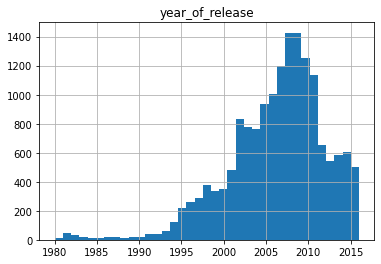

In [33]:
data.hist('year_of_release', bins=37)

Text(0.5, 1.0, 'Количество игр по годам')

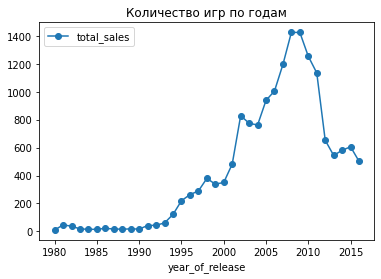

In [34]:
data.pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(style='o-')
plt.title('Количество игр по годам')

Видим рост количества игр с 2002 года, небольшой спад в 2003-2004, затем количество игр измеряется тысячами, но с 2012 их около 500-600 в наших данных.

### Посмотрим, как менялись продажи по платформам

Text(0.5, 0, 'Платформа')

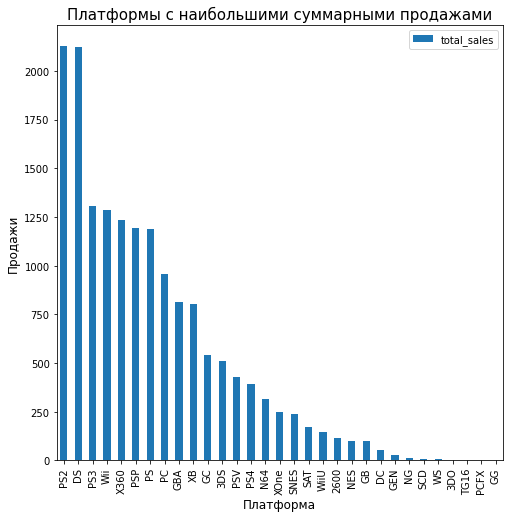

In [35]:
(
    data
 .pivot_table(index='platform', values='total_sales', aggfunc='count')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', figsize=(8,8))
)
plt.title('Платформы с наибольшими суммарными продажами', size=15)
plt.ylabel('Продажи', size=12)
plt.xlabel('Платформа', size=12)

Больше всего продавалось игр для платформ PS2, DS, PS3, Wii, X360, PSP, PS.

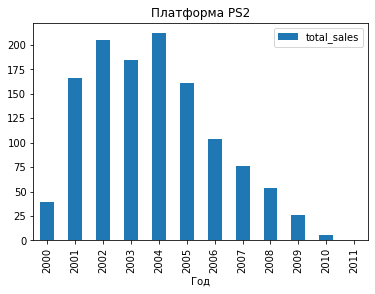

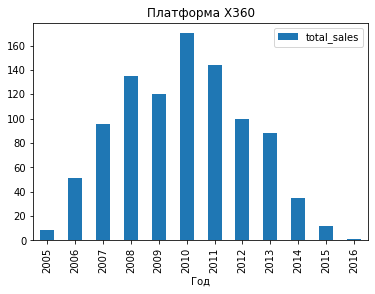

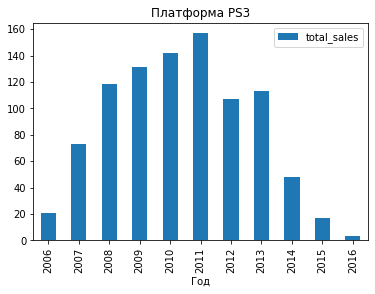

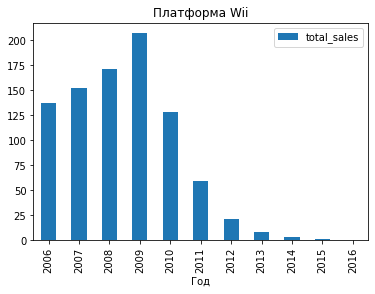

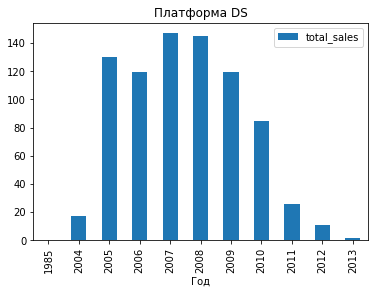

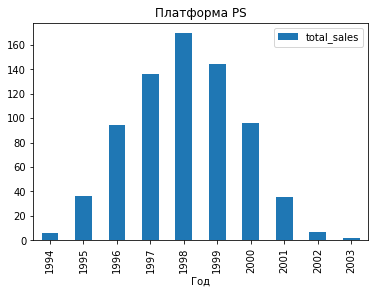

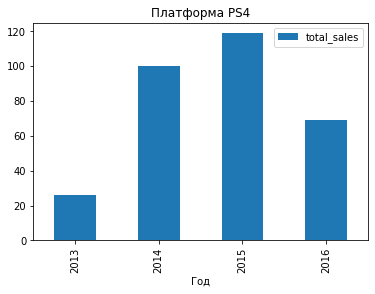

In [36]:
platform_types = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

for platform_type in platform_types:
    df = data.loc[data['platform'] == platform_type]
    df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
    plt.title(f'Платформа {platform_type}')
    plt.xlabel('Год')

Для платформы DS видим выброс 1985 года, возможно это опечатка, потому что платформа была выпущена в 2004 году. Удалим это значение.

In [37]:
data.loc[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,unknown,0.02


In [38]:
data.drop(axis=0, index=15957, inplace=True)

По графикам можно сделать вывод, что:
* платформа **PS2** была популярна в 2001-2005, затем количество игр пошло на убыль;
* количество игр на платформе **X360** росло с 2006-2010, затем постепенно уменьшалось;
* у платформы **PS3** пик популярности пришелся на 2007-2013 год;
* платформа **Wii** набирала популярность с 2006-2010, затем был резки спад;
* платформа **DS** использовалась активно в 2005-2010, в остальные года - намного реже;
* игры на платформе **PS** набирали популярность с 1995-1998, затем постепенно теряли актуальность;
* платформу **PS4** использовали 2013-2016, пик был в 2015.

### Выбор актуального периода

Для построения прогноза на 2017 год лучше взять пару предыдущих лет(количество игр там варьируется от 500 до 600), поэтому возьмем период с 2014-2016. Создадим новый датасет с интересующими нас данными.

In [39]:
games = data.loc[data['year_of_release'] >= 2014]
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    Int64  
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 174.8+ KB


### Платформы, которые лидируют по продажам

<AxesSubplot:xlabel='platform'>

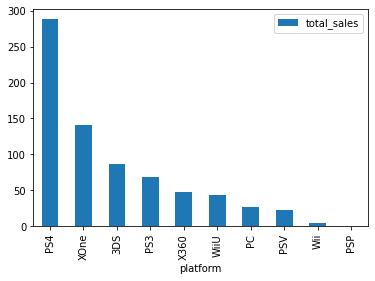

In [40]:
games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).plot(kind='bar')

Самые прибыльные платформы PS4, XOne, 3DS.

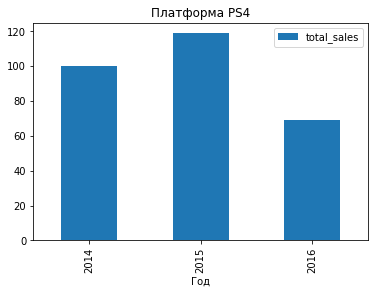

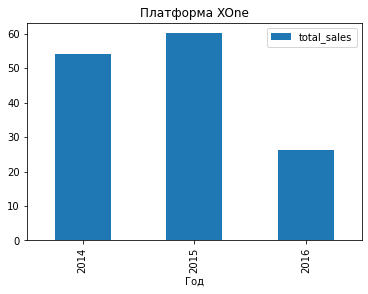

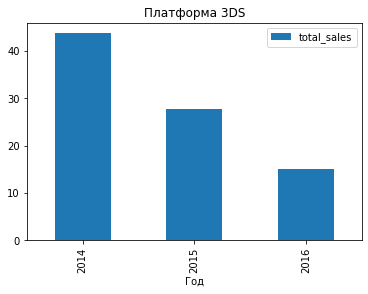

In [41]:
platform_games_types = ['PS4', 'XOne', '3DS']

for platform_type in platform_games_types:
    df1 = games.loc[games['platform'] == platform_type]
    df1.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
    plt.title(f'Платформа {platform_type}')
    plt.xlabel('Год')

<function matplotlib.pyplot.show(close=None, block=None)>

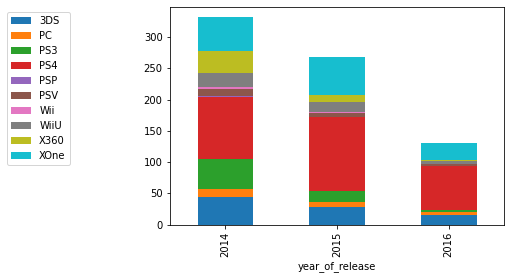

In [42]:
data_graf = games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
data_graf.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(-0.5, 1), loc='upper left', ncol=1)
plt.show

Итак, учитывая, что за 2016 год данные не полные, то можно сказать, что растут продажи для платформ PS4 и XOne.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 2.0)

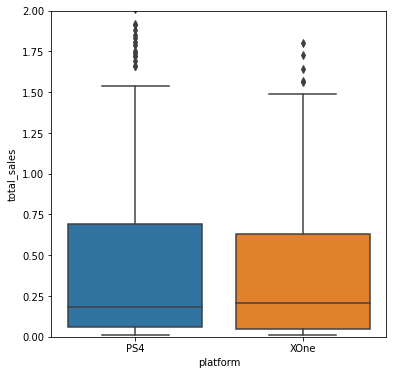

In [43]:
games_top = games.loc[(games['platform'] == 'PS4') | (games['platform'] == 'XOne')]
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='platform', y='total_sales', data=games_top)
plt.ylim(0, 2)

Итак, глобальные продажи игр по платформам PS4 и XOne не сильно отличаются, но PS4 немного больше.

### Влияние отзывов пользователей и критиков на продажи внутри популярной платформы(PS4)

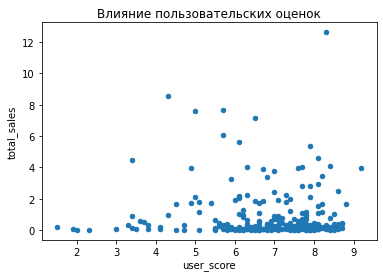

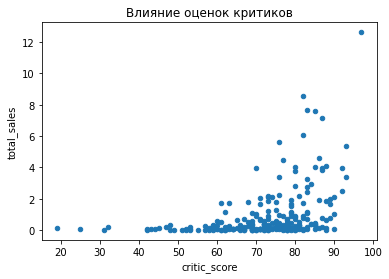

In [44]:
ps4 = games.loc[games['platform'] == 'PS4']
ps4.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Влияние пользовательских оценок')
plt.show()
ps4.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Влияние оценок критиков')
plt.show()

<AxesSubplot:>

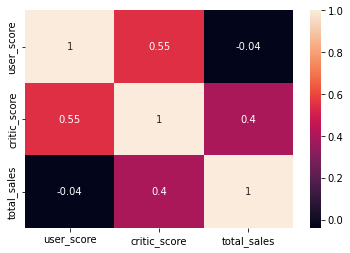

In [45]:
columns = ['user_score', 'critic_score', 'total_sales']
sns.heatmap(ps4[columns].corr(),annot=True)

Коэффициент корреляции между оценками пользователей и продажами близок к нулю и отрицателен, значит линейной взаимосвязи практически нет, это видно и по диаграмме рассеяния. А между оценкой критиков и продажами коэффициент положителен и равен 0.4, то есть связь очень слабая.

### Сравним с продажами игр на других платформах.

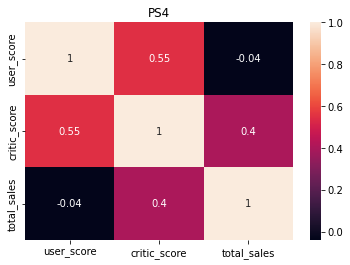

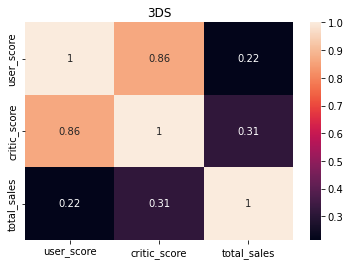

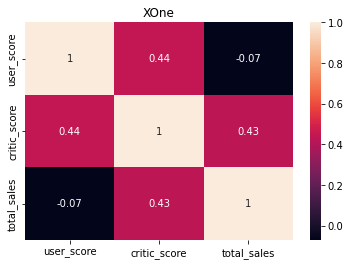

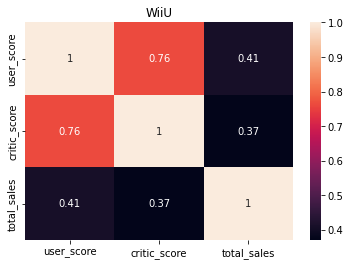

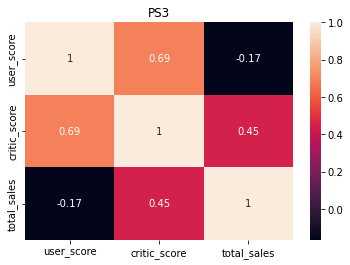

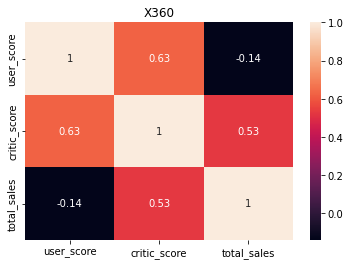

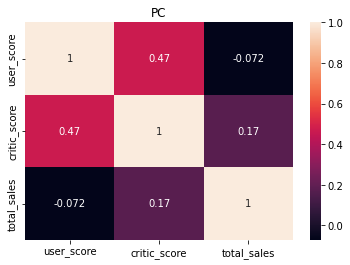

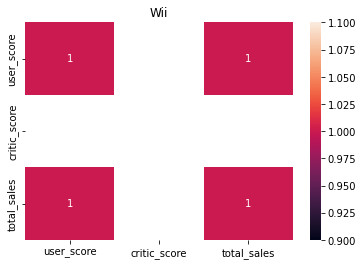

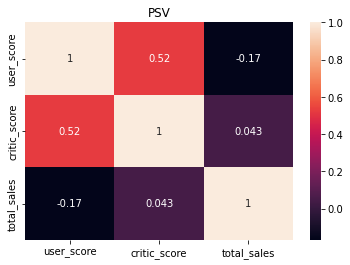

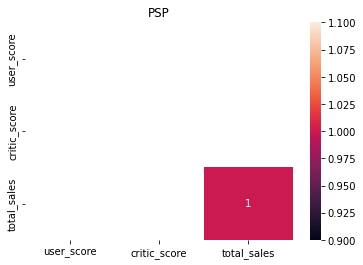

In [46]:
platf_types = games['platform'].unique()
columns = ['user_score', 'critic_score', 'total_sales']

for platf_type in platf_types:
    data_corr = games.loc[games['platform'] == platf_type]
    sns.heatmap(data_corr[columns].corr(),annot=True)
    plt.title(platf_type)
    plt.show()

Так как у нас очень много пропусков в оценках критиков и пользователей, то данные о корреляции у платформ PSP и Wii считаются не верное, не будем учитывать эти данные.

Text(0.5, 1.0, 'Количество продаж в зависимости от платформы')

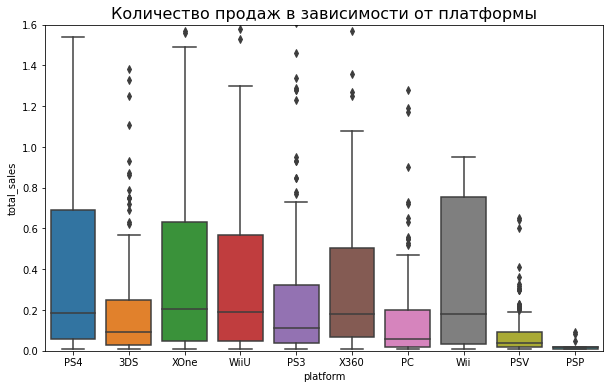

In [47]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='platform', y='total_sales', data=games)
plt.ylim(0, 1.6)
plt.title('Количество продаж в зависимости от платформы', size=16)

**Итак,** 
* сравнивая продажи по всем платформам видим, что лидируют платформы PS4, XOne, WiiU, далее по масштабности идут Wii, X360; 
* коэффициент корреляции между оценкой пользователей и продажами у большинства платформ отрицателен и близок к нулю или положителен, но  также близок к нулю. Самые высокие коэффициенты у платформы WiiU, равный 0.41 и у 3DS равный 0.22;
* коэффициент корреляции между оценкой критиков и продажами положителен и в основном варьируется от 0.31 до 0.45, но есть и близкие к нулю(PSV 0.043). У платформы XOne коэффициент самый высокий и равен 0.53;
* мы получили, что в основном, продажи зависят от оценок критиков, а от оценок пользователей - нет.

### Посмотрим на общее распределение игр по жанрам

<AxesSubplot:xlabel='genre'>

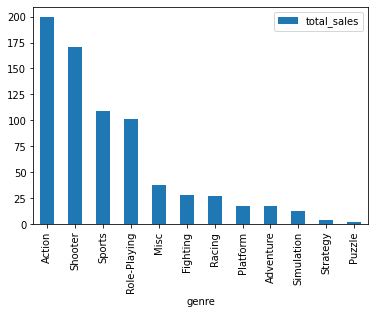

In [48]:
games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).plot(kind='bar')

Самыми популярными являются жанры "Action" и "Shooter"(их более 175 млн копий), самые непопулярные  - пазлы.

<AxesSubplot:xlabel='genre'>

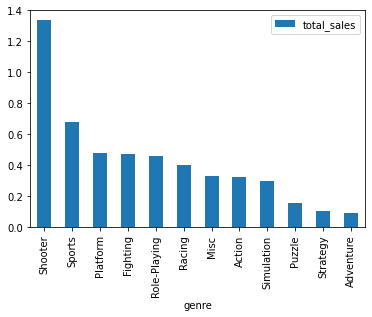

In [49]:
games.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values('total_sales', ascending=False).plot(kind='bar')


Text(0.5, 1.0, 'Количество продаж в зависимости от жанра')

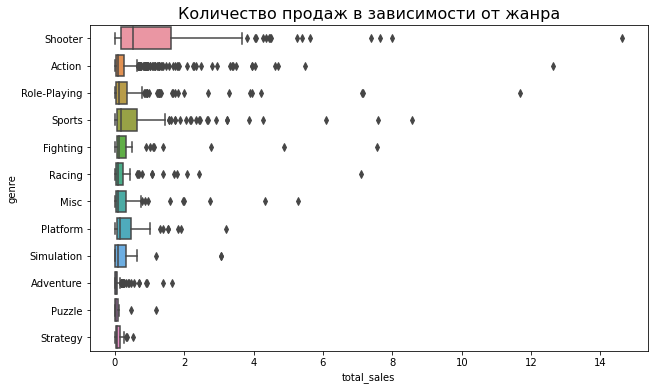

In [50]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='total_sales', y='genre', data=games)
plt.title('Количество продаж в зависимости от жанра', size=16)

Во многих жанрах видим большое количество выбросов.

Text(0.5, 1.0, 'Количество продаж в зависимости от жанра')

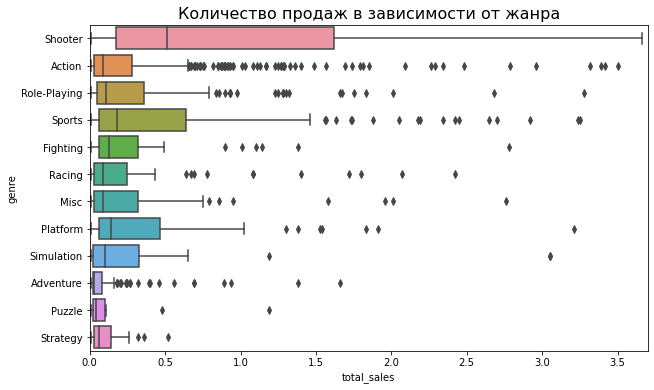

In [51]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='total_sales', y='genre', data=games)
plt.xlim(0, 3.7)
plt.title('Количество продаж в зависимости от жанра', size=16)

Видим, что средние и медианные продажи больше всего у жанра "стрелялки". Далее - спортивные игры.

## Составим портрет пользователя каждого региона

### Самые популярные платформы

In [52]:
pivot_eu = games.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
pivot_eu = pivot_eu.reindex(pivot_eu.sort_values(by='eu_sales', ascending=False).index)
pivot_eu.head()

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


Text(0.5, 1.0, 'Популярные платформы в Европе')

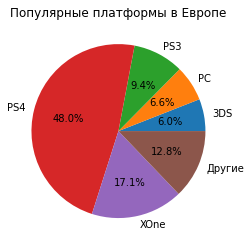

In [53]:
e_types = games.groupby('platform')['eu_sales'].sum()
other= e_types[e_types.values < 16]
e_types = e_types[e_types.values > 16]
e_types['Другие'] = other.sum()
plt.pie(e_types.values, labels=e_types.index, autopct='%1.1f%%')

plt.title('Популярные платформы в Европе')

В Европе чуть меньше половины от всех платформ используют PS4. XOne тоже популярна, большая доля "дригих" платформ.

In [54]:
pivot_na = games.pivot_table(index='platform', values='na_sales', aggfunc='sum')
pivot_na = pivot_na.reindex(pivot_na.sort_values(by='na_sales', ascending=False).index)
pivot_na.head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


Text(0.5, 1.0, 'Популярные платформы в Северной Америке')

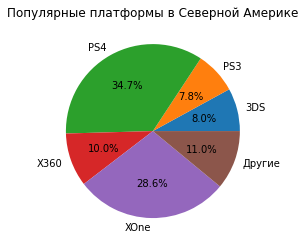

In [55]:
n_types = games.groupby('platform')['na_sales'].sum()
other= n_types[n_types.values < 22]
n_types = n_types[n_types.values > 22]
n_types['Другие'] = other.sum()
plt.pie(n_types.values, labels=n_types.index, autopct='%1.1f%%')
plt.title('Популярные платформы в Северной Америке')

Больше трети используют платформу PS4, чуть меньше трети - XOne.

In [56]:
pivot_jp = games.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
pivot_jp = pivot_jp.reindex(pivot_jp.sort_values(by='jp_sales', ascending=False).index)
pivot_jp.head()

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


Text(0.5, 1.0, 'Популярные платформы в Японии')

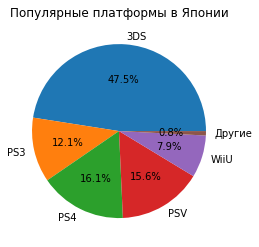

In [57]:
name_types = games.groupby('platform')['jp_sales'].sum()
other= name_types[name_types.values < 7]
name_types = name_types[name_types.values > 7]
name_types['Другие'] = other.sum()
plt.pie(name_types.values, labels=name_types.index, autopct='%1.1f%%')
plt.title('Популярные платформы в Японии')

В Японии чуть меньше половины используют 3DS, остальные делятся между собой почти поровну с небольшими отклонениями в значениях.

### Самые популярные жанры

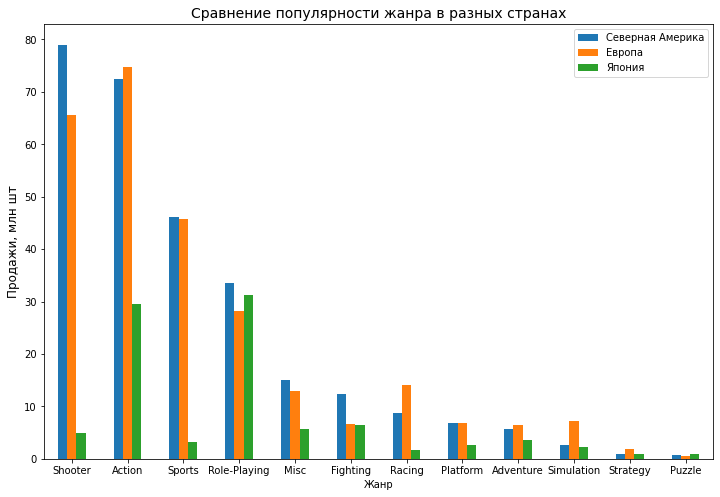

In [58]:
sales_genre = games.groupby('genre')[['na_sales','eu_sales','jp_sales']].agg('sum')

sales_rating = (
    pd.concat([sales_genre], axis=1).reset_index()
    .sort_values(by='na_sales', ascending=False)
)
sales_rating.columns = ['genre', 'Северная Америка', 'Европа', 'Япония']
sales_rating.plot.bar(x='genre',rot=0, figsize =(12, 8))
plt.title('Сравнение популярности жанра в разных странах', fontsize=14)
plt.xlabel('Жанр', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12);

Видим, что в Северной Америке лидируют жанры "стрелялка", далее "экшен". В Европе популярным жанром является "экшен", второе место - "стрелялка". В Японии преобладают игры с жанром "ролевые игры".

### Влияние рейтинга ESRB на продажи

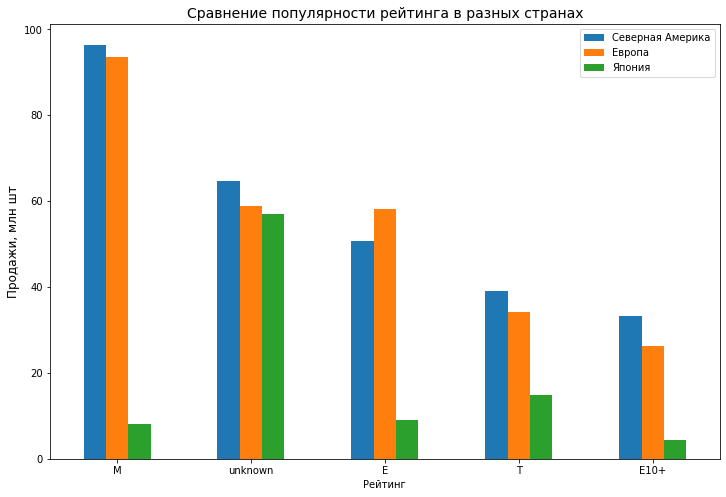

In [59]:
sales_rating = games.groupby('rating')[['na_sales','eu_sales','jp_sales']].agg('sum')

sales_rating = (
    pd.concat([sales_rating], axis=1).reset_index()
    .sort_values(by='na_sales', ascending=False)
)
sales_rating.columns = ['rating', 'Северная Америка', 'Европа', 'Япония']
sales_rating.plot.bar(x='rating',rot=0, figsize =(12, 8))
plt.title('Сравнение популярности рейтинга в разных странах', fontsize=14)
plt.xlabel('Рейтинг', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12);

В Японии преобладает неизвестный рейтинг. Скорее всего это связано с тем, что в Японии своя рейтинговая модель "CERO", которая отличается по критериям от американской "ESRB". В Европе и Северной Америке преобладает рейтинг "М" - от 17 лет.

Text(0.5, 1.0, 'Популярный рейтинг в Европе')

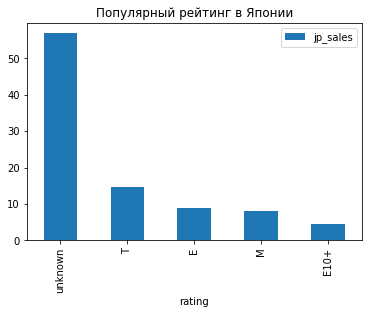

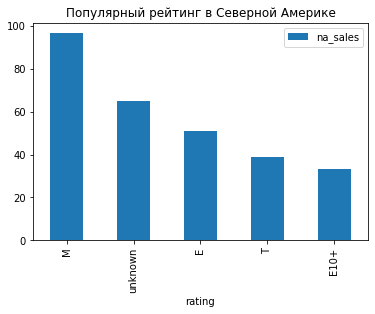

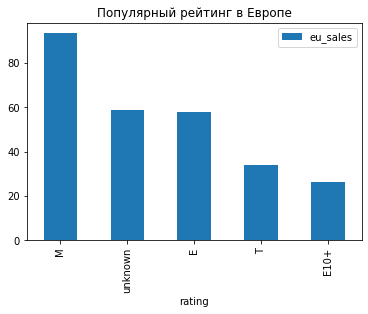

In [60]:
games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).plot(kind='bar')
plt.title('Популярный рейтинг в Японии')
games.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).plot(kind='bar')
plt.title('Популярный рейтинг в Северной Америке')
games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).plot(kind='bar')
plt.title('Популярный рейтинг в Европе')

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

*Гипотеза H0:* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

*Гипотеза H1:* Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [61]:
xone = games.loc[games['platform'] == 'XOne', 'user_score']
pc = games.loc[games['platform'] == 'PC', 'user_score']

Так как у нас много пропусков в оценке пользователей, мы их не заполняли, но для работы статистического метода пустых значений не должно быть. Удалим пустые значения.

In [62]:
xone.dropna(inplace=True)
pc.dropna(inplace=True)

In [63]:
alpha = 0.05
results = st.ttest_ind(xone, pc, equal_var=False)

print('Значение pvalue:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Значение pvalue: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Значение pvalue получилось больше нашего уровня значимости. То есть наши данные не противоречат нулевой гипотезе: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

*Гипотеза Н0:* Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
*Гипотеза Н1:* Средние пользовательские рейтинги жанров Action и Sports разные.

In [64]:
action = games.loc[games['genre'] == 'Action', 'user_score']
sports = games.loc[games['genre'] == 'Sports', 'user_score']

In [65]:
action.dropna(inplace=True)
sports.dropna(inplace=True)

In [66]:
alpha = 0.05
results = st.ttest_ind(action, sports, equal_var=False)
print('Значение pvalue:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Значение pvalue: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Итак, получили значение pvalue близкое к нулю. Это значит, что вероятность получить выраженные различия между средними случайно - близко к нулю. То есть, мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно. Тогда мы отвергаем нулевую гипотезу и принимаем альтернативную о разных средних значений рейтингов жанров Action и Sports.

## Вывод

Мы выяснили, 
* что платформ PS4 и XOne набирают популярность, и они очень популярны в Северной Америке и Европе. Но вот в Японии популярной платформой является 3DS. То есть выбор популярной платформы зависит от региона, где планируется выпуск игры;
* "экшен" и "стрелялки" очень распространены в Европе и Северной Америке, однако в Японии следует сделать акцент на "ролевые игры";
* оценки пользователей не влияют на продажи игры;
* рейтинг критиков влияет на покупку игры как в общем, так и для отдельных платформ. Самая сильная связь между оценкой критиков и платаформой XOne;
* высокие средние продажи у жанров "Action" и "Shooter", то есть они стабильно приносят высокий доход;
* в Европе почти 50% от всех платформ используют PS4. В Северной Америке почти по 30% приходятся на платформы PS4 и XOne. В Японии почти половина игр покупается на платформе 3DS;  
* в Северной Америке и Европе самый распространенный рейтинг - 17+. В Японии в основном пользуются своей моделью рейтинга, который отличается от ESRB;
* средние рейтинги платформ Xbox One и PC одинаковые;
* средние значения рейтингов жанров Action и Sports разные.